# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

## Import Cleaned data

In [2]:
# Importing latest cleaned data
data = pd.read_csv('data/dementia_patients_cleaned_2_After EDA.csv')
data.head(5)

,Diabetic,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,True,98,96.230743,36.224852,57.563978,36.421028,60,2,Left,Female,False,2,False,1,True,10,Low-Carb Diet,False,True,0
1,False,78,93.032122,36.183874,56.832335,31.157633,61,3,Right,Male,False,1,True,3,True,1,Low-Carb Diet,False,True,1
2,False,89,93.566504,37.326321,59.759066,37.640435,69,2,Right,Male,True,1,False,3,True,8,Mediterranean Diet,False,True,0
3,False,60,93.906510,37.030620,58.266471,50.673992,78,3,Left,Female,True,0,False,2,True,5,Balanced Diet,False,True,1
4,True,67,97.508994,36.062121,67.705027,27.810601,77,3,Right,Male,True,0,True,2,True,0,Low-Carb Diet,True,True,1


In [3]:
# This code prepares the data for logistic regression by selecting specific features, scaling the numerical features,
# and combining the numerical and boolean features into a single DataFrame. 

# It also selects the target variable for prediction.

# The numerical features are standardized using StandardScaler from scikit-learn. Finally, the code prints the first few rows
# of the prepared data for inspection.

scaler = StandardScaler()
data_numbers = data[['HeartRate', 'BloodOxygenLevel', 'Weight', 'MRI_Delay', 'Age']]
data_numberscale = data[['Education_Level','Smoking_Status','Physical_Activity','Cognitive_Test_Scores']]
data_boolean = data[['Diabetic','Family_History','APOE_ε4','Depression_Status','Sleep_Quality','Chronic_Health_Conditions']]
data_dementia = data['Dementia']

data_numerical = pd.concat([data_numbers,data_numberscale],axis = 1)
data_predictor = pd.concat([data_numerical,data_boolean], axis = 1)

print("\nNumerical and Scale Data Combined:")
print(data_numerical.head())
print("\nPredictor Data (Numerical, Scale, and Boolean Combined):")
print(data_predictor.head())


Numerical and Scale Data Combined:
   HeartRate  BloodOxygenLevel     Weight  MRI_Delay  Age  Education_Level  \
0         98         96.230743  57.563978  36.421028   60                2   
1         78         93.032122  56.832335  31.157633   61                3   
2         89         93.566504  59.759066  37.640435   69                2   
3         60         93.906510  58.266471  50.673992   78                3   
4         67         97.508994  67.705027  27.810601   77                3   

   Smoking_Status  Physical_Activity  Cognitive_Test_Scores  
0               2                  1                     10  
1               1                  3                      1  
2               1                  3                      8  
3               0                  2                      5  
4               0                  2                      0  

Predictor Data (Numerical, Scale, and Boolean Combined):
   HeartRate  BloodOxygenLevel     Weight  MRI_Delay  Age  Educat

## Random Sampling

In [4]:
# Split the selected_features dataframe into predictors and response
X = data_predictor
y = data_dementia

# Split the dataset into 70% train and 30% test set
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [5]:
print("Dementia vs Non-Dementia Train Set Proportion")
print(y_train.value_counts()[1], ':', y_train.value_counts()[0])

Dementia vs Non-Dementia Train Set Proportion
329 : 371


In [6]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

#Perform the logistics regression
logreg1 = LogisticRegression(solver='liblinear')
 
#Fit the data
logreg1.fit(X_train_scaled,y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t: ", logreg1.score(X_test_scaled,y_test))

The overall classification accuracy 		:  0.99


In [7]:
def visualisation(table, y_true, y_pred, title):
    
    # Calculate confusion matrix and metrics
    cf = confusion_matrix(y_true, y_pred)
    accuracy = np.trace(cf) / float(np.sum(cf))

    if sum(cf[:, 1]) == 0:
        precision = 0.0
    else:
        precision = cf[1, 1] / sum(cf[:, 1])

    if sum(cf[1, :]) == 0:
        recall = 0.0
    else:
        recall = cf[1, 1] / sum(cf[1, :])

    if (precision + recall) == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * precision * recall / (precision + recall)

    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
        accuracy, precision, recall, f1_score)

    # Plot confusion matrix
    plt.figure(figsize=(8, 8))
    sb.heatmap(cf, fmt='.0f', annot=True)
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)

    # Add metrics to table
    metrics = pd.DataFrame([[accuracy, precision, recall, f1_score]])
    table = pd.concat([table, metrics], axis=1)

    return table


In [8]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()

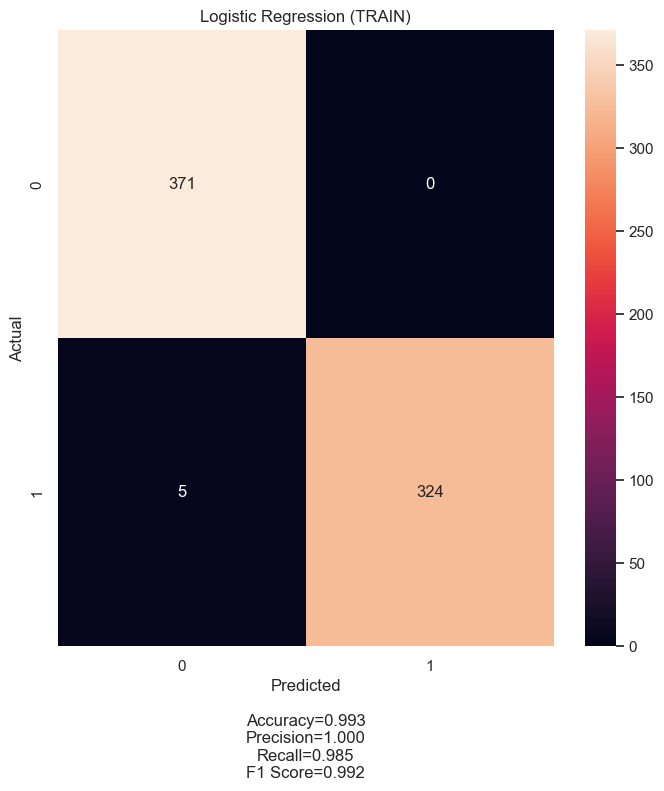

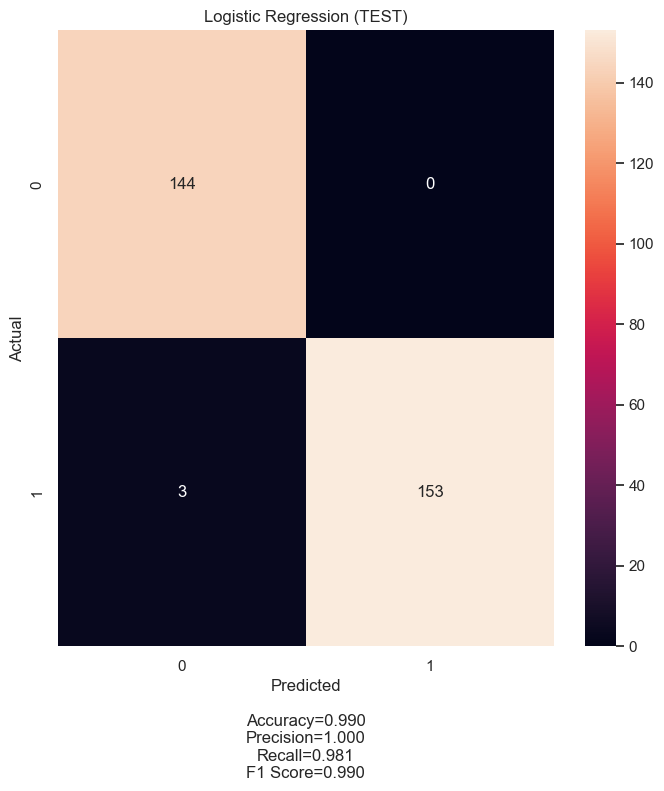

In [9]:
#Predict the data
y_train_pred = logreg1.predict(X_train_scaled)
y_test_pred = logreg1.predict(X_test_scaled)

#Visualizing the data
table1 = visualisation(table1,y_train,y_train_pred, title = 'Logistic Regression (TRAIN)')
table2 = visualisation(table2,y_test,y_test_pred, title = 'Logistic Regression (TEST)')

### We are curious to know what significance do different variables has in our model hence we decided to find their coefficients

In [10]:
#Find out the significance of different variables in the model

coefficients = logreg1.coef_[0]
intercept = logreg1.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.03879285 -0.21813623 -0.08156359 -0.11070899 -0.09553588 -0.01220953
 -0.19711869 -0.05577766 -7.01516499 -0.06603025  0.09377288  0.5060029
  0.         -0.11099406  0.        ]
Intercept: 1.435905948023986


### We then decided to implement another model without 'Cognitive_Test_Scores' and see whether the model is still efficient in solving our problem (detecting dementia).